In [3]:
import sys, os
sys.path.append("../..")
import gempy as gp
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import string

no gdal


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
extent = [0,400,0,400,0,300]
resolution=[40,40,40]

In [5]:
geo_data=gp.create_data(extent=extent, 
                        path_i= os.pardir+"/data/input_data/fold_model/foldmodel_interf10.csv",
                        path_o= os.pardir+"/data/input_data/fold_model/foldmodel_orient10.csv")

In [16]:
formations = list(string.ascii_lowercase)[:len(np.unique(geo_data.interfaces['formation']))-1]

In [17]:
formations.reverse()

In [18]:
gp.set_series(geo_data,order_formations=formations)

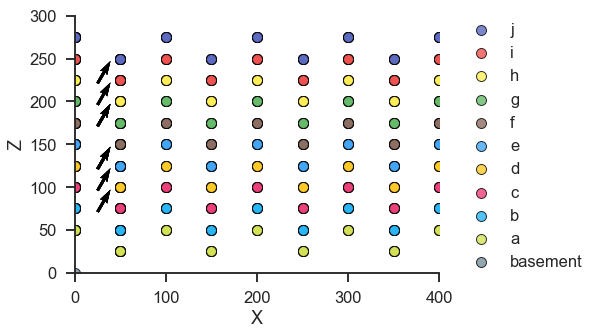

In [19]:
gp.plotting.plot_data(geo_data)

In [20]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0


In [21]:
lith_block, fault_block = gp.compute_model(interp_data)

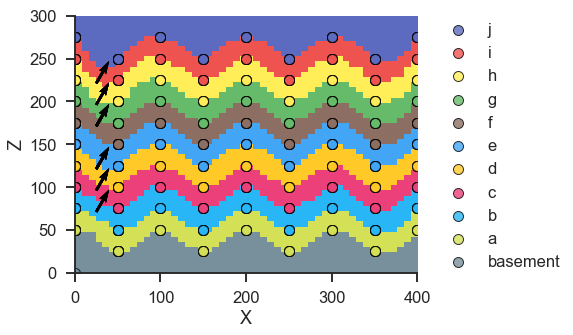

In [22]:
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=0,  direction='y', plot_data=True)

In [23]:
ver , sim = gp.get_surfaces(interp_data, lith_block[1])

In [24]:
gp.plotting.plot_surfaces_3D(geo_data, ver, sim)

closing vtk
